In [344]:
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, train_test_split

# Data Path

In [345]:
data1 = "/Users/Derrick/Desktop/data science new topic/SAT_Results.csv" # data path to data
data2 = "/Users/Derrick/Desktop/data science new topic/nysd.csv"
data3 = "/Users/Derrick/Desktop/data science new topic/NYS_Math_Test_Results_By_Grade_2006-2011_-_School_Level_-_All_Students.csv"
data4 = "/Users/Derrick/Desktop/data science new topic/School_Attendance_and_Enrollment_Statistics_by_District__2010-11_.csv"
data5 = "/Users/Derrick/Desktop/data science new topic/School_Demographics_and_Accountability_Snapshot_2006-2012.csv"
data6 = "/Users/Derrick/Desktop/data science new topic/Graduation_Outcomes_-_Classes_Of_2005-2010_-_School_Level.csv"
data7 = "/Users/Derrick/Desktop/data science new topic/AP__College_Board__2010_School_Level_Results.csv"
data8 = "/Users/Derrick/Desktop/data science new topic/2010-2011_Class_Size_-_School-level_detail.csv"
data9 = "/Users/Derrick/Desktop/data science new topic/masterfile11_d75_final.xlsx"
data10 = "/Users/Derrick/Desktop/data science new topic/masterfile11_gened_final.xlsx"
data11 = "/Users/Derrick/Desktop/data science new topic/Survey Data Dictionary.xls"
data12 = "/Users/Derrick/Desktop/data science new topic/DOE_High_School_Directory_2014-2015.csv"
data13 = "/Users/Derrick/Desktop/data science new topic/School_Progress_Report_2010-2011.csv"
data14 = "/Users/Derrick/Desktop/data science new topic/School_District_Breakdowns.csv"
data15 = "/Users/Derrick/Desktop/data science new topic/attendance.csv"

# Cleaning Data

### SAT result data
 In this data set, it only provided the scores in 3 categories, and we need to add a aveage total score column 
 and we only need two column out of it, DBN and Total Average Score

In [346]:
sat_result = pd.read_csv(data1)
#sat_result.head()

In [347]:
sat_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
dtypes: object(6)
memory usage: 22.5+ KB


In [348]:
new_sat_result = sat_result.drop("Num of SAT Test Takers", 1)
new_sat_result['SAT Math Avg. Score'] = new_sat_result['SAT Math Avg. Score'].convert_objects(convert_numeric = True)
new_sat_result['SAT Critical Reading Avg. Score'] = new_sat_result['SAT Critical Reading Avg. Score'].convert_objects(convert_numeric = True)
new_sat_result['SAT Writing Avg. Score'] = new_sat_result['SAT Writing Avg. Score'].convert_objects(convert_numeric = True)

/Users/Derrick/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/Users/Derrick/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/Users/Derrick/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [349]:
new_sat_result["Total_Avg"] = new_sat_result.apply(lambda x: x['SAT Math Avg. Score'] + x['SAT Critical Reading Avg. Score'] + x['SAT Writing Avg. Score'], axis=1)

In [350]:
new_sat_result = new_sat_result.rename(columns={"Total_Avg":"SAT_Avg",})
sat_result = new_sat_result[['DBN', 'SAT_Avg']]

### Class Size data
 In this data set, it doesn't provide us the DBN column, and we have to manually made one.
 The DBN column is actually made up of 3 items, CSD, Borough and School Code, and we take that 3 column and made them in to one column

In [351]:
class_size = pd.read_csv(data8)
class_size.head(1)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN


In [352]:
class_size["DBN"] = class_size.apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
class_size.head(1)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015


In [353]:
cols_list = class_size.columns.tolist()
cols_list

['CSD',
 'BOROUGH',
 'SCHOOL CODE',
 'SCHOOL NAME',
 'GRADE ',
 'PROGRAM TYPE',
 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
 'CORE COURSE (MS CORE and 9-12 ONLY)',
 'SERVICE CATEGORY(K-9* ONLY)',
 'NUMBER OF STUDENTS / SEATS FILLED',
 'NUMBER OF SECTIONS',
 'AVERAGE CLASS SIZE',
 'SIZE OF SMALLEST CLASS',
 'SIZE OF LARGEST CLASS',
 'DATA SOURCE',
 'SCHOOLWIDE PUPIL-TEACHER RATIO',
 'DBN']

the DBN column is added at the last column and I want it to show at the first column just like the other data set, and also remove the 3 items we just added in to DBN

In [354]:
cols_swap = cols_list[-1:] + cols_list[:-1]
cols_swap

['DBN',
 'CSD',
 'BOROUGH',
 'SCHOOL CODE',
 'SCHOOL NAME',
 'GRADE ',
 'PROGRAM TYPE',
 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
 'CORE COURSE (MS CORE and 9-12 ONLY)',
 'SERVICE CATEGORY(K-9* ONLY)',
 'NUMBER OF STUDENTS / SEATS FILLED',
 'NUMBER OF SECTIONS',
 'AVERAGE CLASS SIZE',
 'SIZE OF SMALLEST CLASS',
 'SIZE OF LARGEST CLASS',
 'DATA SOURCE',
 'SCHOOLWIDE PUPIL-TEACHER RATIO']

In [355]:
class_size = class_size[cols_swap]
class_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 17 columns):
DBN                                     27611 non-null object
CSD                                     27611 non-null int64
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLAS

### Attendence

In [356]:
attd_2010 = pd.read_csv(data4)
attd_2010.head()

,District,YTD % Attendance (Avg),YTD Enrollment(Avg)
0,DISTRICT 01,91.18%,12367
1,DISTRICT 02,89.01%,60823
2,DISTRICT 03,89.28%,21962
3,DISTRICT 04,91.13%,14252
4,DISTRICT 05,89.08%,13170


In [357]:
new_attendance = attd_2010
new_attendance['District'] = attd_2010.apply(lambda x: x['District'].replace('DISTRICT ', ''), axis=1)
new_attendance = new_attendance.drop([33, 34])
new_attendance['District'] = new_attendance.apply(lambda x: x['District'].replace('SPECIAL ED ', ''), axis=1)
new_attendance['YTD % Attendance (Avg)'] = new_attendance.apply(lambda x: x['YTD % Attendance (Avg)'].replace('%', ''), axis=1)
new_attendance = new_attendance.rename(columns={'YTD % Attendance (Avg)':'Avg_Attendance', 'YTD Enrollment(Avg)':'Avg_enrollment'})

In [358]:
new_attendance = new_attendance.rename(columns={'Avg_Attendance':"Avg_atendance" })
new_attendance['Avg_atendance'] = new_attendance['Avg_atendance'].convert_objects(convert_numeric = True)

/Users/Derrick/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [359]:
attd_2010 = new_attendance

### School Progress Report (school grade)

In [360]:
progress = pd.read_csv(data13)
progress.head(1)

,DBN,DISTRICT,SCHOOL,PRINCIPAL,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
0,01M015,1,P.S. 015 Roberto Clemente,Irene Sanchez,EMS,Elementary,63.61,C,27.0,6.4,B,2.1,D,18.0,C,0.5,C


In [361]:
school_grade = progress[progress["SCHOOL LEVEL*"] == "High School"]

In [362]:
school_grade = school_grade.drop(["DISTRICT", "SCHOOL", "PRINCIPAL", "PROGRESS REPORT TYPE", "SCHOOL LEVEL*"], axis=1)

In [363]:
school_grade = school_grade.rename(columns={'\ufeffDBN':'DBN'})

### High School Directory
For drawing map

In [364]:
hs_dir = pd.read_csv(data12)
hs_dir.head(1)

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."


Rename column "dbn" to "DBN" by making another copy of the column and delete the "dbn" 

In [365]:
hs_dir["DBN"] = hs_dir["dbn"]

In [366]:
hs_dir = hs_dir.drop(hs_dir.columns[[0]], axis=1) #drop the old "dbn" column

In [367]:
cols_list2 = hs_dir.columns.tolist()

In [368]:
cols2_swap2 = cols_list2[-1:] + cols_list2[:-1] #swap the DBN column into the first column
cols2_swap2[:3]

['DBN', 'school_name', 'boro']

In [369]:
hs_dir['lat'] = hs_dir['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[0])
hs_dir['lon'] = hs_dir['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[1])

for c in ['lat', 'lon']:
    hs_dir[c] = hs_dir[c].convert_objects(convert_numeric=True)

/Users/Derrick/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [370]:
total_students = hs_dir[['DBN', 'total_students']]

### Addition data cleaning for our class size data set
select only grade 9-12, and only general education and then groupby DBN column

In [371]:
#new_class_size = class_size
new_class_size = class_size[class_size["GRADE "] == "09-12"]
new_class_size = new_class_size[new_class_size["PROGRAM TYPE"] == "GEN ED"]
new_class_size = new_class_size.groupby("DBN").agg(np.mean)
new_class_size.reset_index(inplace=True)
class_size = new_class_size[['DBN', 'AVERAGE CLASS SIZE']]

### Math Test Result

In [372]:
math_test_result = pd.read_csv(data3)
math_test_result.head(1)

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,All Students,39,667,2,5.1%,11,28.2%,20,51.3%,6,15.4%,26,66.7%


In [373]:
math_test_result = math_test_result[math_test_result["Year"] == 2011]
math_test_result = math_test_result[math_test_result["Grade"] == "8"]

### Demographic Data

In [374]:
demographic = pd.read_csv(data5)
demographic.head(2)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4


In [375]:
demographics = demographic
demographics = demographics[demographics["schoolyear"] == 20082009]
demographic = demographics

In [377]:
demographic.head(1)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9


In [379]:
demographics_required_col = ['DBN', 'male_per', 'female_per', 'asian_per', 'black_per',
                             'hispanic_per', 'white_per', 'total_enrollment']

In [381]:
demographic = demographic[demographics_required_col]

In [383]:
demographic.head()

,DBN,male_per,female_per,asian_per,black_per,hispanic_per,white_per,total_enrollment
3,01M015,59.1,40.9,6.3,29.8,59.1,2.8,252
10,01M019,48.0,52.0,12.0,25.5,45.8,9.8,325
17,01M020,48.2,51.8,23.6,9.3,63.4,1.5,593
24,01M034,50.5,49.5,6.6,20.5,69.6,2.1,424
32,01M063,63.8,36.2,9.5,17.1,65.3,7.0,199


In [384]:
demographic = demographic.dropna()

# Merge Data & Selecting Features

for map drawing purpose

In [385]:
data = {'sat_result': sat_result, 
        #'class_size': class_size, 
        'hs_dir': hs_dir, 
        'math_test_result': math_test_result,
        'demographic': demographic,
        #'graduation_2010': graduation_2010,
        #'ap_2010': ap_2010,
        #'attd_2010': attd_2010,
        'progress': progress}

In [386]:
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]
final = flat_data[0]
for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    #print(name)
    #print(len(f['DBN']) - len(f['DBN'].unique()))
    join_type = "inner"
    if name in ["sat_result"]:
        join_type = "outer"
    if name not in ["math_test_result"]:
        final = final.merge(f, on="DBN", how=join_type)

final.shape

(419, 84)

for machine learning

In [387]:
sat_class_size = pd.merge(class_size, sat_result, how='inner', on='DBN')
sat_class_size = sat_class_size.dropna()

In [388]:
sat_class_size_temp = sat_class_size
sat_class_size_temp['District'] = sat_class_size_temp.apply(lambda x: x['DBN'][0:2], axis=1)

In [389]:
sat_size_atte = pd.merge(sat_class_size_temp, attd_2010, how='inner', on='District')

In [390]:
sat_size_atte_grade = pd.merge(sat_size_atte, school_grade, how='inner', on='DBN')

In [391]:
sat_size_atte_grade.head(2)

,DBN,AVERAGE CLASS SIZE,SAT_Avg,District,Avg_atendance,Avg_enrollment,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
0,01M292,22.564286,1122.0,01,91.18,12367,1.81,C,49.8,6.9,D,12.8,C,30.1,C,NaN,D
1,01M448,22.231250,1172.0,01,91.18,12367,2.03,C,57.6,6.9,D,13.9,C,35.8,B,1.0,C


In [392]:
grade_remove_col = ["2010-2011 OVERALL GRADE", "2010-2011 ENVIRONMENT GRADE", "2010-2011 PERFORMANCE GRADE", "2010-2011 PROGRESS GRADE", "2010-2011 ADDITIONAL CREDIT", "2009-10 PROGRESS REPORT GRADE"]

In [393]:
sat_size_atte_grade_temp = sat_size_atte_grade.drop(grade_remove_col, axis=1)

In [394]:
sat_size_atte_grade_temp = sat_size_atte_grade_temp.dropna()

In [395]:
sat_size_atte_grade_temp.head(1)

,DBN,AVERAGE CLASS SIZE,SAT_Avg,District,Avg_atendance,Avg_enrollment,PEER INDEX*,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PROGRESS CATEGORY SCORE
0,01M292,22.564286,1122.0,01,91.18,12367,1.81,49.8,6.9,12.8,30.1


In [396]:
len(school_grade)

426

In [416]:
school_grade_required = school_grade[['DBN','2010-2011 OVERALL GRADE']]

In [417]:
total_students.head(3)

,DBN,total_students
0,17K548,399.0
1,09X543,378.0
2,09X327,543.0


In [418]:
sat_size_peer = sat_size_atte_grade_temp[['DBN', 'AVERAGE CLASS SIZE', 'SAT_Avg', 'PEER INDEX*', '2010-2011 PROGRESS CATEGORY SCORE']]

In [419]:
sat_size_peer.head(1)

,DBN,AVERAGE CLASS SIZE,SAT_Avg,PEER INDEX*,2010-2011 PROGRESS CATEGORY SCORE
0,01M292,22.564286,1122.0,1.81,30.1


In [420]:
sat_size_peer_students = pd.merge(sat_size_peer, total_students, how='inner', on='DBN')

In [421]:
sat_size_peer_students_demographics = pd.merge(sat_size_peer_students, demographic, how='inner', on='DBN')

In [422]:
sat_size_peer_students_demographics.head(1)

,DBN,AVERAGE CLASS SIZE,SAT_Avg,PEER INDEX*,2010-2011 PROGRESS CATEGORY SCORE,total_students,male_per,female_per,asian_per,black_per,hispanic_per,white_per,total_enrollment
0,01M292,22.564286,1122.0,1.81,30.1,323.0,56.2,43.8,10.0,29.4,56.2,3.0,470


merge with school_grade

In [423]:
sat_size_peer_students_demographic_grade = pd.merge(school_grade_required, sat_size_peer_students_demographics, how='inner', on='DBN')

In [424]:
sat_size_peer_students_demographic_grade.head(1)

,DBN,2010-2011 OVERALL GRADE,AVERAGE CLASS SIZE,SAT_Avg,PEER INDEX*,2010-2011 PROGRESS CATEGORY SCORE,total_students,male_per,female_per,asian_per,black_per,hispanic_per,white_per,total_enrollment
0,01M292,C,22.564286,1122.0,1.81,30.1,323.0,56.2,43.8,10.0,29.4,56.2,3.0,470


In [425]:
grade_dict = {'A': 1,
              'B': 2,
              'C': 3,
              'D': 4,
              'F': 5,}

In [426]:
grade_number = sat_size_peer_students_demographic_grade.replace(to_replace={'2010-2011 OVERALL GRADE': grade_dict})

In [427]:
grade_number.head()

,DBN,2010-2011 OVERALL GRADE,AVERAGE CLASS SIZE,SAT_Avg,PEER INDEX*,2010-2011 PROGRESS CATEGORY SCORE,total_students,male_per,female_per,asian_per,black_per,hispanic_per,white_per,total_enrollment
0,01M292,3,22.564286,1122.0,1.81,30.1,323.0,56.2,43.8,10.0,29.4,56.2,3.0,470
1,01M448,3,22.231250,1172.0,2.03,35.8,299.0,52.4,47.6,19.3,23.5,47.8,4.3,586
2,01M450,1,21.200000,1149.0,2.26,38.7,649.0,52.2,47.8,6.2,26.6,59.7,6.0,546
3,01M509,3,23.571429,1207.0,1.78,30.6,401.0,52.2,47.8,11.8,17.7,68.7,1.8,441
4,01M539,1,25.510526,1621.0,3.48,42.4,1725.0,48.0,52.0,21.8,11.2,16.6,49.4,1302


# Looking for relationship between features and target by visualizing the data

In [428]:
features = ['AVERAGE CLASS SIZE',
                       'SAT_Avg',
                       'PEER INDEX*',
                       'total_students',
                       'male_per',
                       'female_per',
                       'asian_per',
                       'black_per',
                       'hispanic_per',
                       'white_per',
                       'total_enrollment',
                       '2010-2011 PROGRESS CATEGORY SCORE']
target = ['2010-2011 OVERALL GRADE']

DBN                                   object
2010-2011 OVERALL GRADE                int64
AVERAGE CLASS SIZE                   float64
SAT_Avg                              float64
PEER INDEX*                          float64
2010-2011 PROGRESS CATEGORY SCORE    float64
total_students                       float64
male_per                             float64
female_per                           float64
asian_per                            float64
black_per                            float64
hispanic_per                         float64
white_per                            float64
total_enrollment                       int64
dtype: object

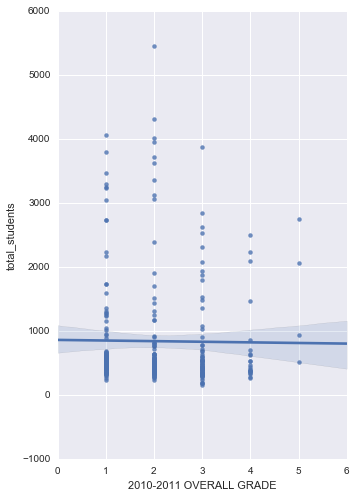

In [433]:
sns.pairplot(grade_number, x_vars=target,
             y_vars=['total_students'], size=7, aspect=0.7, kind='reg')

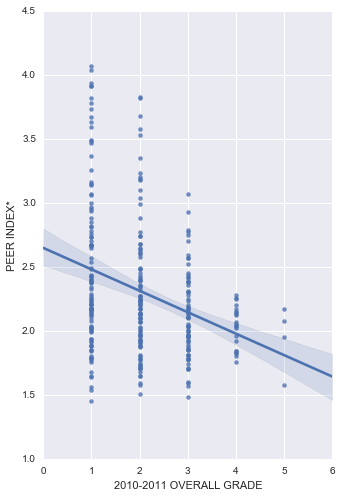

In [432]:
sns.pairplot(grade_number, x_vars=target,
             y_vars=['PEER INDEX*'], size=7, aspect=0.7, kind='reg')

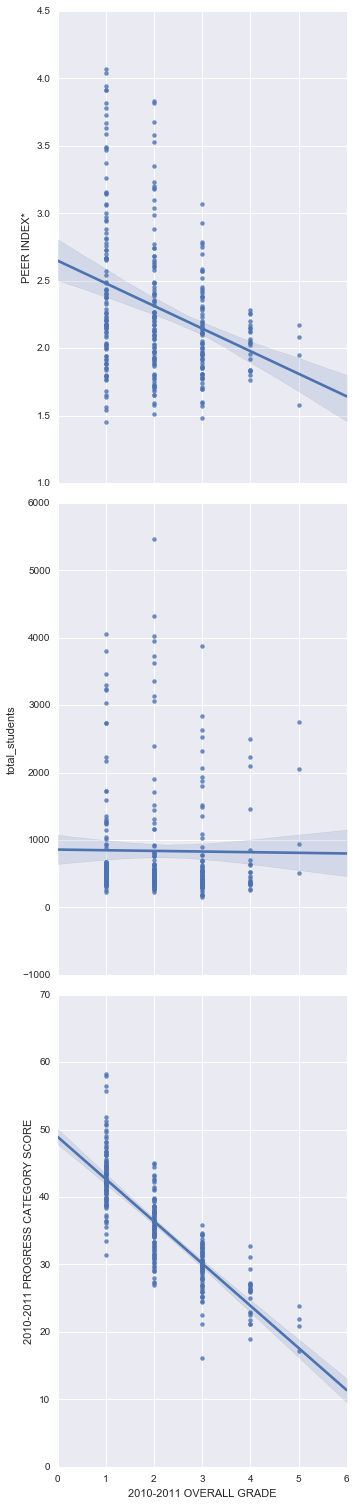

In [435]:
sns.pairplot(grade_number, x_vars=target,
             y_vars=['PEER INDEX*', 'total_students', '2010-2011 PROGRESS CATEGORY SCORE'], size=7, aspect=0.7, kind='reg')

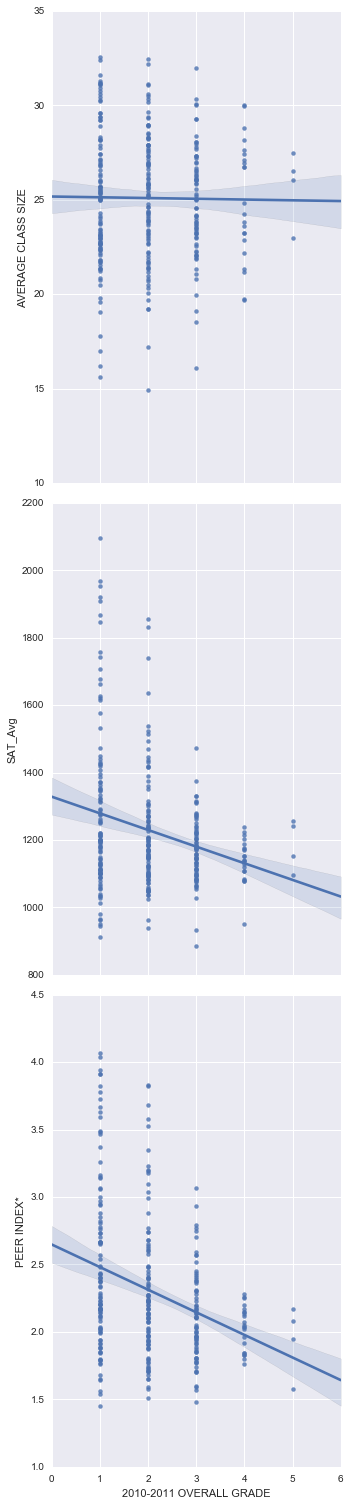

In [436]:
sns.pairplot(grade_number, x_vars=target,
             y_vars=['AVERAGE CLASS SIZE',
                       'SAT_Avg',
                       'PEER INDEX*'], size=7, aspect=0.7, kind='reg')

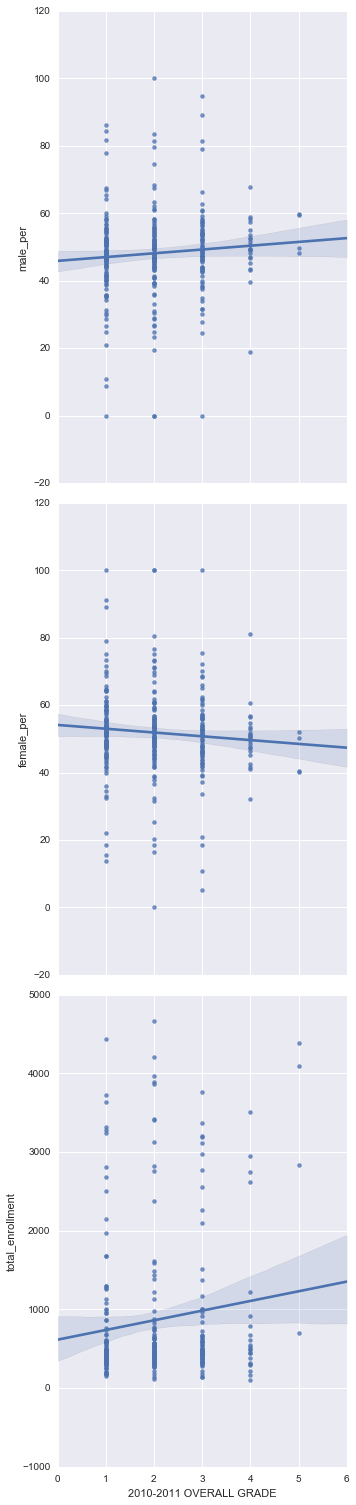

In [438]:
sns.pairplot(grade_number, x_vars=target,
             y_vars=['male_per',
                       'female_per',
                       'total_enrollment'], size=7, aspect=0.7, kind='reg')

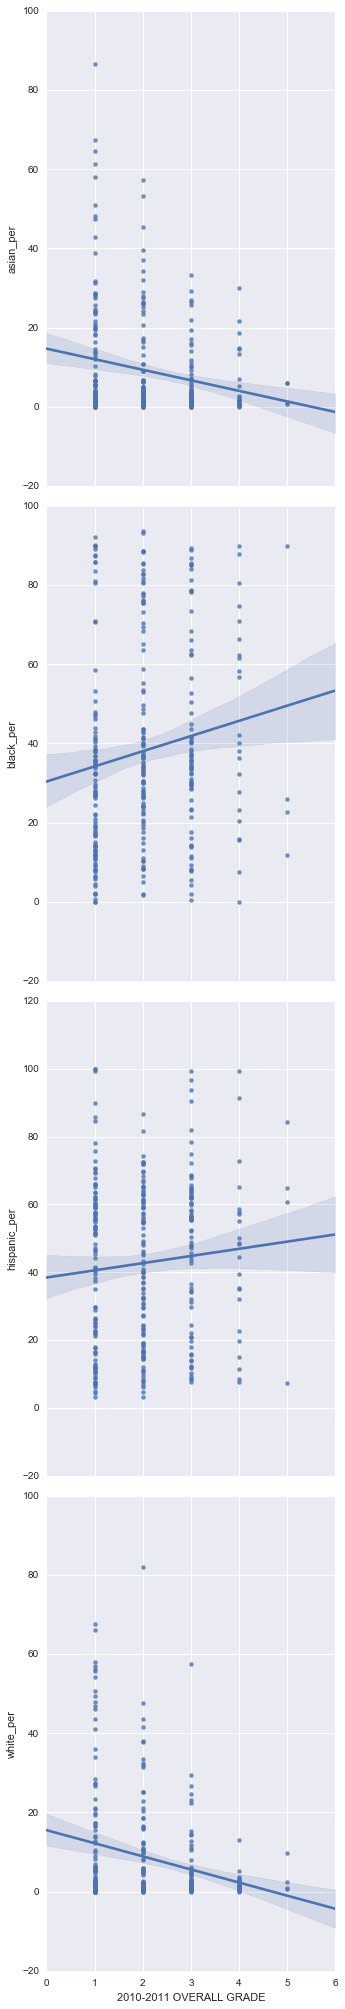

In [439]:
sns.pairplot(grade_number, x_vars=target,
             y_vars=['asian_per',
                       'black_per',
                       'hispanic_per',
                       'white_per'], size=7, aspect=0.7, kind='reg')

# START PREDICTING........

# CLASSIFICATION METHOD with CROSS VALIDATION

In [440]:
feature_data = grade_number[['SAT_Avg', 'PEER INDEX*', 'female_per', 'asian_per', 'white_per', '2010-2011 PROGRESS CATEGORY SCORE']]
target_data = grade_number['2010-2011 OVERALL GRADE']

In [442]:
feature_data.shape

(306, 6)

In [443]:
target_data.shape

(306,)

 ## KNN 

In [446]:
knn_score=[]
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, feature_data, target_data, cv=3, scoring='accuracy').mean()
    knn_score.append(score)
    
knn_score

[0.46692307692307694,
 0.49013071895424837,
 0.41526646556058316,
 0.46436400201106082,
 0.45468577174459529,
 0.46077677224736052,
 0.38552036199095019,
 0.43776018099547515,
 0.41174459527400703,
 0.41205630970336848,
 0.41872800402212168,
 0.41199849170437403,
 0.41828054298642531,
 0.37584967320261436,
 0.40212921065862245,
 0.36629964806435389,
 0.39892408245349426,
 0.38918552036199094,
 0.38546757164404227]

## The average knn score is.......

In [450]:
knn_score_np = np.array(knn_score).mean()
knn_score_np *100 # convert to %

41.92679473948823

## ~42% is not the idea accuracy we want. try another method

## Support Vector Classification (linear and non linear)

In [453]:
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcess
from sklearn.naive_bayes import GaussianNB

In [466]:
svc_nonlin = SVC(gamma=2, C=1)

In [467]:
score = cross_val_score(svc_nonlin, feature_data, target_data, cv=4, scoring='accuracy').mean()
score * 100

34.96832553411501

## still not a ideal accuracy, its bad, cross out non-linear SVC
## try linear SVC

In [468]:
svc_linear = SVC(kernel="linear", C=0.025)

In [469]:
score = cross_val_score(svc_linear, feature_data, target_data, cv=4, scoring='accuracy').mean()
score * 100

67.945536919221126

## looks good!!
## but we're not giving up yet, try gaussian naive bayes

In [470]:
gaussian_nb = GaussianNB()

In [471]:
score = cross_val_score(gaussian_nb, feature_data, target_data, cv=4, scoring='accuracy').mean()
score * 100

57.122092819461244

## nah~ we're gonna stick with the linear SVC method

In [472]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, random_state=1)

In [473]:
svc_linear.fit(X_train, y_train)

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [475]:
svc_linear.score(X_train, y_train) * 100

70.3056768558952

In [478]:
svc_linear.score(X_test, y_test) * 100

67.532467532467535

In [481]:
predict_grade = svc_linear.predict(X_test)
predict_grade

array([1, 1, 3, 3, 2, 1, 2, 1, 3, 1, 2, 3, 2, 1, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 2, 1, 4, 1, 1, 2, 1, 1, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 2, 2, 2, 3,
       3, 2, 1, 1, 2, 1, 1, 1, 4, 2, 2, 3, 3, 4, 3, 4, 3, 2, 1, 2, 1, 2, 2,
       1, 1, 1, 3, 3, 3, 1, 3])

In [485]:
real = y_test.values
real

array([1, 1, 4, 3, 1, 1, 2, 1, 2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 2,
       1, 2, 1, 4, 1, 1, 2, 1, 1, 2, 2, 3, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       3, 2, 1, 1, 2, 2, 2, 1, 4, 3, 2, 1, 3, 2, 2, 4, 3, 2, 2, 3, 2, 2, 1,
       1, 1, 1, 3, 3, 3, 1, 2])

In [484]:
len(predict_grade)

77

In [504]:
predict_x = [i for i in range(77)]

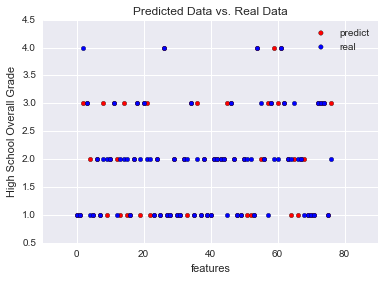

In [507]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(predict_x,predict_grade,c='r',label='predict')
ax.scatter(predict_x,y_test,c='b',label='real')
plt.xlabel('features')
plt.ylabel('High School Overall Grade')
plt.title('Predicted Data vs. Real Data')

ax.legend()

# Conclusion

In this part, we predict the high school grade using features like, SAT average score, sex, races, peer index and etc. We throw in this features into our classification model and see which method is the best suit for our data. And it turn out to be the linear support vector classification has the highest accuracy among the other method. So we decided to use thid method to predict the high school grade and then compare our prediction with the real data. I would say the prediction is pretty good. As you can see from the scatter plot above, the blue dot represent the real high school grad while the red represent our predicted grade, the predicted grade vs real data was that off based on the visualization from the plot.  